In [9]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dseta
import torchvision.transforms as transform
import matplotlib.pyplot as plt
%matplotlib inline

### Loading Trainning and Testing Data

In [4]:
train_data = dseta.MNIST(root = './Data',transform=transform.ToTensor(),download= True)

100.1%

Extracting ./Data/MNIST/raw/train-images-idx3-ubyte.gz


113.5%

Extracting ./Data/MNIST/raw/train-labels-idx1-ubyte.gz


100.4%

Extracting ./Data/MNIST/raw/t10k-images-idx3-ubyte.gz


180.4%

Extracting ./Data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [5]:
test_data = dseta.MNIST(root = './Data',transform=transform.ToTensor(),download= True,train=False)

In [6]:
len(train_data)

60000

In [7]:
len(test_data)

10000

### Exploring Train and Test Data

In [13]:
type(train_data[0])

tuple

In [14]:
len(train_data[0])

2

In [16]:
train_data[0][0].numpy().shape

(1, 28, 28)

In [19]:
train_data[0][1]

5

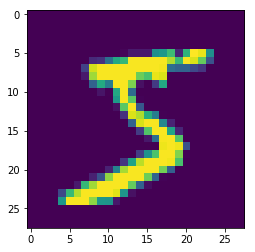

In [23]:
disp = train_data[0][0].numpy().reshape(28,28)
plt.imshow(disp)

In [27]:
print("Label:",train_data[0][1])

Label: 5


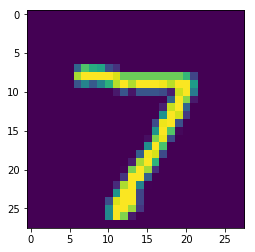

In [25]:
disp = test_data[0][0].numpy().reshape(28,28)
plt.imshow(disp)

In [28]:
print("Label:",test_data[0][1])

Label: 7


### Creating Trainning Class

In [69]:
class LogisticRegression(nn.Module):
    
    def __init__(self,indim,outdim):
        
        super(LogisticRegression,self).__init__()
        self.Linear = nn.Linear(indim,outdim)
        
    def forward(self,X):
        out = self.Linear(X)
        return out

### Creating Iteratable DataSet Object

In [70]:
train_iter = torch.utils.data.DataLoader(dataset=train_data,batch_size=100,shuffle=True)
test_iter = torch.utils.data.DataLoader(dataset=test_data,batch_size=100,shuffle=True)

In [71]:
indim = 28 * 28
outdim = 10

LogReg = LogisticRegression(indim,outdim)

In [72]:
c_loss = nn.CrossEntropyLoss()

In [73]:
optim = torch.optim.SGD(params=LogReg.parameters(),lr=0.001)

In [74]:
num_of_epoc = 5

In [79]:
for epoc in range(num_of_epoc):
    
    for i,(image,label) in enumerate(train_iter):
        
        total = 0
        correct = 0
        
        image = image.view(-1,28*28)
        optim.zero_grad()
        
        output = LogReg.forward(image)
        #print(output)
        loss = c_loss(output,label)
        
        loss.backward()
        
        optim.step()
        
        if i % 500 == 0:
            
            for j,(image,label) in enumerate(test_iter):
        
                image = image.view(-1,28*28)
                output = LogReg.forward(image)
                _,pred = torch.max(output.data,1)
                
                total += label.size(0)
                correct += (pred == label).sum()
            
            accuracy = 100 * correct / total
            
            print("Total:{},Correct:{}".format(total,correct))
            print("Step:{},Loss:{},accuracy:{}".format(i,loss.data,accuracy))

Total:10000,Correct:8415
Step:0,Loss:0.844533383846283,accuracy:84
Total:10000,Correct:8459
Step:500,Loss:0.7881724834442139,accuracy:84
Total:10000,Correct:8466
Step:0,Loss:0.8595506548881531,accuracy:84
Total:10000,Correct:8502
Step:500,Loss:0.8086681365966797,accuracy:85
Total:10000,Correct:8515
Step:0,Loss:0.8215182423591614,accuracy:85
Total:10000,Correct:8536
Step:500,Loss:0.8578434586524963,accuracy:85
Total:10000,Correct:8547
Step:0,Loss:0.6601617336273193,accuracy:85
Total:10000,Correct:8581
Step:500,Loss:0.7317733764648438,accuracy:85
Total:10000,Correct:8582
Step:0,Loss:0.7376450896263123,accuracy:85
Total:10000,Correct:8603
Step:500,Loss:0.7030050754547119,accuracy:86
